In [33]:
!pip install folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_school_info = pd.read_excel('./data/학교알리미/2023년_학교기본정보_부산광역시교육청.xlsx')
df_school_info["지역"] = df_school_info["지역"].str.replace("부산광역시 ", "")
df_school_info["지역"]

0      연제구
1       중구
2       중구
3       남구
4       남구
      ... 
313    강서구
314    강서구
315    기장군
316    기장군
317    강서구
Name: 지역, Length: 318, dtype: object

In [34]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'cmtt10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'cmsy10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmb10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeOneSym',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmss10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'cmr10',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'Engravers MT',
 'Algerian',
 'Perpetua',
 'HYGothic-Medium',
 'Tw Cen MT',
 'Arial',
 'Microsoft JhengHei',
 'Lucida Sans Typewriter',
 'Microsoft PhagsPa',
 'Segoe Script',
 'Rockwell',
 'Matura MT Script Capitals',
 'Georgia',
 'Malgun Gothic',
 'Lucida Console',
 'High Tower Text',
 'Tahoma',
 'New Gulim',
 'Gill Sans MT Condensed',
 '

<Axes: xlabel='지역', ylabel='count'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumGothic' not found.
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
C:\User

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing

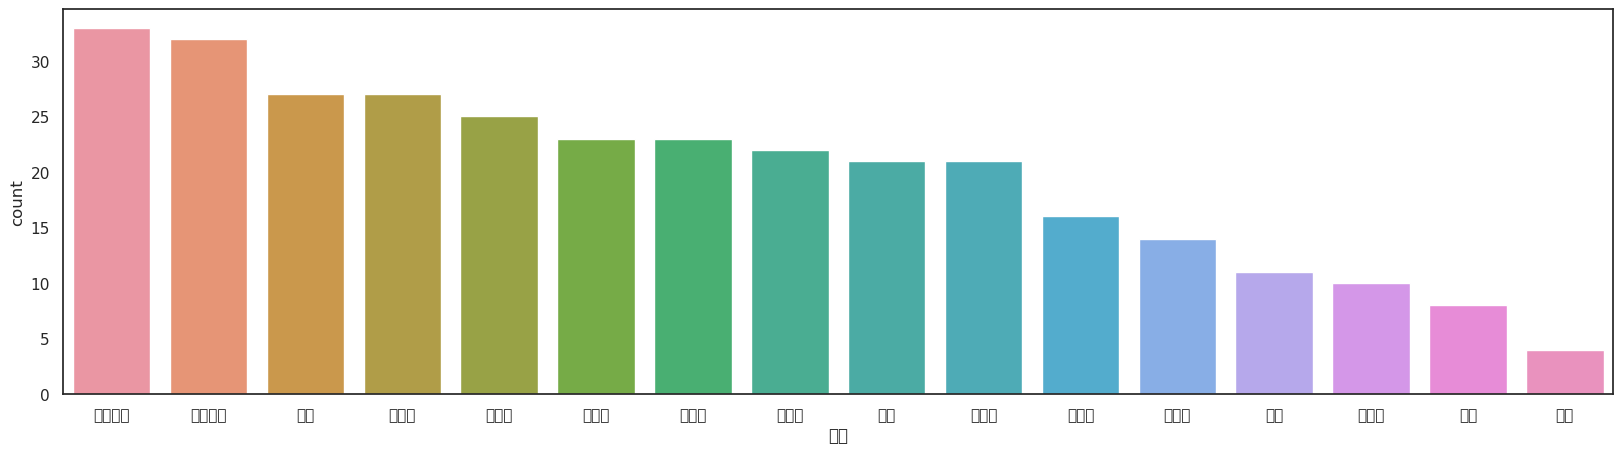

In [41]:
plt.figure(figsize=(20,5))
# 한글이 깨지는 오류를 수정하기 위해 아래와 같은 코드 첨부

font_path = 'C:\\Users\\USER\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)
#sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
# df_school_info의 지역을 기준으로 groupby 진행 후 해당 지역에 대한 count를 새 column으로 지정해줌
df_school_info_group_by_city = df_school_info[["지역"]].groupby(["지역"])["지역"].count().sort_values(ascending=False).reset_index(name="count")

sns.barplot(data=df_school_info_group_by_city, x="지역", y="count")

In [136]:
import folium       
import json

geo_path = "./data/학교알리미/busan_gu.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location = [35.1856505,129.1], zoom_start=9)

df = df_school_info[["지역"]].groupby(["지역"])["지역"].count().sort_values(ascending=False)
for idx, row in enumer
#df = df_school_info[["지역"]].groupby("지역").count()
#df


지역
해운대구    33
부산진구    32
북구      27
사하구     27
강서구     25
금정구     23
동래구     23
기장군     22
남구      21
사상구     21
연제구     16
영도구     14
서구      11
수영구     10
동구       8
중구       4
Name: 지역, dtype: int64

In [137]:
folium.Choropleth(
    name="지역구",
    geo_data = geo_str, 
    data = df,
    #columns = [df_school_info_group_by_city.index, df_school_info_group_by_city["count"]],
    fill_color='YlOrRd', # 색상 변경도 가능하다
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='(구) 별 학교 분포',
    key_on='properties.name'
).add_to(map)

#horopleth.geojson.add_child(folium.features.GeoJsonTooltip(['tooltip1'], labels=False))
#title_html='<div>안녕</div>'
#map.get_root().html.add_child(folium.Element(title_html))
#folium.LayerControl().add_to(map)

map


In [57]:

# 학교별의 위치를 지도(마커)로 표현


location = df_school_info[["위도", "경도"]]
location.head(5)

map= folium.Map(location=[35.194573, 129.075497], zoom_start=11, titles='Stamen Toner')

for idx, ser in location.iterrows():
    if ser["위도"] > 0 and ser["경도"]:
        folium.Marker(location=[ser["위도"], ser["경도"]]).add_to(map)
    
map